In [1]:
# Import the required modules
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler

# suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
df_full = pd.read_csv('used_clean.csv')

# Review the DataFrame
df_full.head()

,price,miles,year,make,model,trim,body_type,vehicle_type,drivetrain,transmission,fuel_type,engine_size,engine_block,city,state,zip
0,24411.0,69051,2017,Chevrolet,Express Cargo,Work Van,Cargo Van,Truck,RWD,Automatic,E85 / Unleaded,4.8,V,Manchester,MD,21102.0
1,48500.0,47916,2018,Ford,F-150,Lariat,Pickup,Truck,4WD,Automatic,Unleaded,3.5,V,Harrisburg,PA,17111.0
2,12981.0,92889,2017,Ford,Focus,SE,Sedan,Car,FWD,Automatic,E85 / Unleaded,2.0,I,Greenwood,IN,46143.0
3,18650.0,41815,2019,Hyundai,Veloster,Ultimate,Coupe,Car,FWD,Manual,Unleaded,1.6,I,Plainfield,IN,46168.0
4,28776.0,103774,2017,Ford,F-150,XLT,Pickup,Truck,4WD,Automatic,Unleaded,2.7,V,Boaz,AL,35957.0


In [24]:
col = ['price', 'miles', 'year', 'make', 'model', 'trim', 'body_type',
       'vehicle_type', 'drivetrain', 'transmission', 'fuel_type',
       'engine_size', 'engine_block', 'state']

df = df_full[col].copy()

In [25]:
df.columns

Index(['price', 'miles', 'year', 'make', 'model', 'trim', 'body_type',
       'vehicle_type', 'drivetrain', 'transmission', 'fuel_type',
       'engine_size', 'engine_block', 'state'],
      dtype='object')

In [26]:
columns = ['price', 'miles', 'year', 'make', 'model', 'trim', 'body_type',
       'vehicle_type', 'drivetrain', 'transmission', 'fuel_type',
       'engine_size', 'engine_block', 'state']
for col in columns:
    print(col)
    print(df[col].nunique())
    print(df[col].value_counts())

price
29181
price
19995.0    705
18995.0    619
17995.0    600
21995.0    592
16995.0    572
          ... 
45733.0      1
49882.0      1
56279.0      1
17529.0      1
16813.0      1
Name: count, Length: 29181, dtype: int64
miles
70223
miles
33000    29
5000     27
29000    27
24000    24
4000     24
         ..
99796     1
16870     1
56396     1
21159     1
48013     1
Name: count, Length: 70223, dtype: int64
year
6
year
2018    49993
2019    30110
2017    27584
2020    21879
2016    17472
2021     2962
Name: count, dtype: int64
make
31
make
Ford             20993
Chevrolet        16876
Toyota           13790
Nissan           10616
Jeep              9765
Honda             9021
Hyundai           5670
GMC               5526
RAM               5408
Kia               5038
BMW               4969
Mercedes-Benz     4885
Subaru            4403
Dodge             4362
Volkswagen        3446
Lexus             3082
Audi              2715
Mazda             2335
Cadillac          2032
Buick        

In [27]:
df["engine_size"] = df["engine_size"].apply(lambda x: 0 if x == 'E' else x)
df.head()

,price,miles,year,make,model,trim,body_type,vehicle_type,drivetrain,transmission,fuel_type,engine_size,engine_block,state
0,24411.0,69051,2017,Chevrolet,Express Cargo,Work Van,Cargo Van,Truck,RWD,Automatic,E85 / Unleaded,4.8,V,MD
1,48500.0,47916,2018,Ford,F-150,Lariat,Pickup,Truck,4WD,Automatic,Unleaded,3.5,V,PA
2,12981.0,92889,2017,Ford,Focus,SE,Sedan,Car,FWD,Automatic,E85 / Unleaded,2.0,I,IN
3,18650.0,41815,2019,Hyundai,Veloster,Ultimate,Coupe,Car,FWD,Manual,Unleaded,1.6,I,IN
4,28776.0,103774,2017,Ford,F-150,XLT,Pickup,Truck,4WD,Automatic,Unleaded,2.7,V,AL


In [28]:
df.engine_size = df.engine_size.astype(float)

In [29]:
def label_engine_size(engine):
    if 0.1 <= engine < 2:
        return 1
    elif 2 <= engine < 3:
        return 2
    elif 3 <= engine < 4:
        return 3
    elif 4 <= engine < 5:
        return 4
    elif 5 <= engine < 6:
        return 5
    elif 6 <= engine < 7:
        return 6
    elif 7 <= engine < 8:
        return 7
    else:
        return 0

# Apply the custom function to the 'fuel_type' column
df['engine_size'] = df['engine_size'].apply(label_engine_size)

# Show the modified DataFrame
df.head(10)

,price,miles,year,make,model,trim,body_type,vehicle_type,drivetrain,transmission,fuel_type,engine_size,engine_block,state
0,24411.0,69051,2017,Chevrolet,Express Cargo,Work Van,Cargo Van,Truck,RWD,Automatic,E85 / Unleaded,4,V,MD
1,48500.0,47916,2018,Ford,F-150,Lariat,Pickup,Truck,4WD,Automatic,Unleaded,3,V,PA
2,12981.0,92889,2017,Ford,Focus,SE,Sedan,Car,FWD,Automatic,E85 / Unleaded,2,I,IN
3,18650.0,41815,2019,Hyundai,Veloster,Ultimate,Coupe,Car,FWD,Manual,Unleaded,1,I,IN
4,28776.0,103774,2017,Ford,F-150,XLT,Pickup,Truck,4WD,Automatic,Unleaded,2,V,AL
5,45800.0,27211,2017,INFINITI,QX80,Base,SUV,Truck,RWD,Automatic,Premium Unleaded,5,V,TX
6,65464.0,6129,2020,GMC,Sierra 1500 Denali,Denali,Pickup,Truck,4WD,Automatic,Unleaded,6,V,MO
7,16800.0,10006,2018,Chevrolet,Trax,LT,SUV,Truck,FWD,Automatic,Unleaded,1,I,MI
8,25590.0,16051,2020,Toyota,Prius Prime,LE,Hatchback,Car,FWD,Automatic,Electric / Unleaded,1,I,AZ
9,47885.0,52248,2017,Ford,F-150,Platinum,Pickup,Truck,4WD,Automatic,Unleaded,3,V,GA


In [30]:
df.engine_size.value_counts()

engine_size
2    60123
3    40910
1    23419
5    14703
6     7227
4     3085
0      503
7       30
Name: count, dtype: int64

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         150000 non-null  float64
 1   miles         150000 non-null  int64  
 2   year          150000 non-null  int64  
 3   make          150000 non-null  object 
 4   model         150000 non-null  object 
 5   trim          150000 non-null  object 
 6   body_type     150000 non-null  object 
 7   vehicle_type  150000 non-null  object 
 8   drivetrain    150000 non-null  object 
 9   transmission  150000 non-null  object 
 10  fuel_type     150000 non-null  object 
 11  engine_size   150000 non-null  int64  
 12  engine_block  150000 non-null  object 
 13  state         150000 non-null  object 
dtypes: float64(1), int64(3), object(10)
memory usage: 16.0+ MB


In [32]:
df.describe()

,price,miles,year,engine_size
count,150000.000000,150000.000000,150000.000000,150000.000000
mean,30420.410373,38052.116520,2018.134840,2.638813
std,14623.129257,26603.702378,1.262353,1.332115
min,7000.000000,500.000000,2016.000000,0.000000
25%,19999.000000,19862.000000,2017.000000,2.000000
50%,26998.000000,32290.000000,2018.000000,2.000000
75%,36997.000000,49198.000000,2019.000000,3.000000
max,349900.000000,299878.000000,2021.000000,7.000000


In [33]:
['price', 'miles', 'year', 'make', 'model' 'body_type',
       'vehicle_type', 'drivetrain', 'transmission', 'fuel_type',
       'engine_size', 'engine_block', 'city', 'state']
# Encoding, separate out features
meta = ['price']
num_features = ['miles', 'year', 'engine_size']
cat_features = ['make', 'model', 'trim', 'body_type', 'vehicle_type', 'drivetrain', 'transmission', 'fuel_type', 'engine_block', 'state']

In [34]:
# NUMERIC FIRST - Do we need a SCALER?
df_num = df.loc[:, num_features]
df_num.describe()

,miles,year,engine_size
count,150000.000000,150000.000000,150000.000000
mean,38052.116520,2018.134840,2.638813
std,26603.702378,1.262353,1.332115
min,500.000000,2016.000000,0.000000
25%,19862.000000,2017.000000,2.000000
50%,32290.000000,2018.000000,2.000000
75%,49198.000000,2019.000000,3.000000
max,299878.000000,2021.000000,7.000000


In [35]:
# YES we need a scaler

# initialize
scaler = StandardScaler()

# fit
scaler.fit(df_num)

# predict/transform
scaled_data = scaler.transform(df_num)
df_scaled = pd.DataFrame(scaled_data, columns=num_features)

df_scaled.head()

,miles,year,engine_size
0,1.165213,-0.898991,1.021827
1,0.370772,-0.106817,0.271139
2,2.061257,-0.898991,-0.479550
3,0.141443,0.685357,-1.230239
4,2.470412,-0.898991,-0.479550


In [36]:
# Categorical Up Next
df_cat = df.loc[:, cat_features]
df_cat.head()

,make,model,trim,body_type,vehicle_type,drivetrain,transmission,fuel_type,engine_block,state
0,Chevrolet,Express Cargo,Work Van,Cargo Van,Truck,RWD,Automatic,E85 / Unleaded,V,MD
1,Ford,F-150,Lariat,Pickup,Truck,4WD,Automatic,Unleaded,V,PA
2,Ford,Focus,SE,Sedan,Car,FWD,Automatic,E85 / Unleaded,I,IN
3,Hyundai,Veloster,Ultimate,Coupe,Car,FWD,Manual,Unleaded,I,IN
4,Ford,F-150,XLT,Pickup,Truck,4WD,Automatic,Unleaded,V,AL


In [37]:
df_cat["vehicle_type"] = df_cat.vehicle_type.apply(lambda x: 0 if x == "Truck" else 1)
df_cat.head()

,make,model,trim,body_type,vehicle_type,drivetrain,transmission,fuel_type,engine_block,state
0,Chevrolet,Express Cargo,Work Van,Cargo Van,0,RWD,Automatic,E85 / Unleaded,V,MD
1,Ford,F-150,Lariat,Pickup,0,4WD,Automatic,Unleaded,V,PA
2,Ford,Focus,SE,Sedan,1,FWD,Automatic,E85 / Unleaded,I,IN
3,Hyundai,Veloster,Ultimate,Coupe,1,FWD,Manual,Unleaded,I,IN
4,Ford,F-150,XLT,Pickup,0,4WD,Automatic,Unleaded,V,AL


In [38]:
df_cat["transmission"] = df_cat.transmission.apply(lambda x: 0 if x == "Automatic" else 1)
df_cat.head()

,make,model,trim,body_type,vehicle_type,drivetrain,transmission,fuel_type,engine_block,state
0,Chevrolet,Express Cargo,Work Van,Cargo Van,0,RWD,0,E85 / Unleaded,V,MD
1,Ford,F-150,Lariat,Pickup,0,4WD,0,Unleaded,V,PA
2,Ford,Focus,SE,Sedan,1,FWD,0,E85 / Unleaded,I,IN
3,Hyundai,Veloster,Ultimate,Coupe,1,FWD,1,Unleaded,I,IN
4,Ford,F-150,XLT,Pickup,0,4WD,0,Unleaded,V,AL


In [39]:
cutoff = 500
application_types_to_replace = df_cat.model.value_counts()[df_cat.model.value_counts() < cutoff].index.tolist()

# Replace in dataframe
for app in application_types_to_replace:
    df_cat['model'] = df_cat['model'].replace(app,"Other")

# Check to make sure replacement was successful
df_cat['model'].value_counts()

model
Other                         43432
F-150                          6013
Silverado 1500                 4128
Ram 1500 Pickup                3541
Equinox                        2933
                              ...  
Q5                              541
F-350 Super Duty                536
TLX                             509
All-New Wrangler Unlimited      505
Frontier                        502
Name: count, Length: 87, dtype: int64

In [40]:
df_cat.head()

,make,model,trim,body_type,vehicle_type,drivetrain,transmission,fuel_type,engine_block,state
0,Chevrolet,Other,Work Van,Cargo Van,0,RWD,0,E85 / Unleaded,V,MD
1,Ford,F-150,Lariat,Pickup,0,4WD,0,Unleaded,V,PA
2,Ford,Focus,SE,Sedan,1,FWD,0,E85 / Unleaded,I,IN
3,Hyundai,Other,Ultimate,Coupe,1,FWD,1,Unleaded,I,IN
4,Ford,F-150,XLT,Pickup,0,4WD,0,Unleaded,V,AL


In [42]:
cutoff = 500
application_types_to_replace = df_cat.trim.value_counts()[df_cat.trim.value_counts() < cutoff].index.tolist()

# Replace in dataframe
for app in application_types_to_replace:
    df_cat['trim'] = df_cat['trim'].replace(app,"Other")

# Check to make sure replacement was successful
df_cat['trim'].value_counts()

trim
Other                 34386
SE                     9972
Limited                7153
LT                     6981
Base                   6338
S                      5965
XLT                    5406
LX                     4521
SV                     4116
Sport                  3981
LE                     3571
SEL                    3160
Premium                3115
EX                     2620
1LT                    2279
XLE                    2279
Touring                2089
SLT                    2033
EX-L                   1955
Lariat                 1749
SL                     1702
XL                     1680
Latitude               1637
Denali                 1549
Platinum               1549
LS                     1504
SXT                    1459
Premium Plus           1458
SR5                    1428
Titanium               1338
350                    1197
Premier                1183
GT                     1118
SR                     1074
LTZ                    1027
SLE            

In [43]:
def label_fuel_type(fuel):
    fuel = fuel.lower()  # Convert to lowercase for consistent matching
    if 'diesel' in fuel:
        return 'Diesel'
    elif 'electric' in fuel and '/' in fuel:
        return 'Hybrid'
    elif fuel == 'electric':
        return 'Electric'
    else:
        return 'Gas'

# Apply the custom function to the 'fuel_type' column
df_cat['fuel_type'] = df_cat['fuel_type'].apply(label_fuel_type)

# Show the modified DataFrame
df_cat.head(10)

,make,model,trim,body_type,vehicle_type,drivetrain,transmission,fuel_type,engine_block,state
0,Chevrolet,Other,Other,Cargo Van,0,RWD,0,Gas,V,MD
1,Ford,F-150,Lariat,Pickup,0,4WD,0,Gas,V,PA
2,Ford,Focus,SE,Sedan,1,FWD,0,Gas,I,IN
3,Hyundai,Other,Other,Coupe,1,FWD,1,Gas,I,IN
4,Ford,F-150,XLT,Pickup,0,4WD,0,Gas,V,AL
5,INFINITI,Other,Base,SUV,0,RWD,0,Gas,V,TX
6,GMC,Other,Denali,Pickup,0,4WD,0,Gas,V,MO
7,Chevrolet,Trax,LT,SUV,0,FWD,0,Gas,I,MI
8,Toyota,Other,LE,Hatchback,1,FWD,0,Hybrid,I,AZ
9,Ford,F-150,Platinum,Pickup,0,4WD,0,Gas,V,GA


In [44]:
df_cat.fuel_type.value_counts()

fuel_type
Gas         142228
Diesel        4010
Hybrid        3253
Electric       509
Name: count, dtype: int64

In [45]:
def label_body_type(body):
    if 'Car Van'  in body or 'Combi' in body:
        return 'Cargo Van'
    elif 'Targa' in body or 'Roadster' in body:
        return 'Coupe'
    elif 'Cutaway' in body or 'Chassis Cab' in body:
        return 'Pickup'
    elif 'Targa' in body:
        return 'Roadster'
    elif 'Mini Mpv' in body:
        return 'Hatchback'
    elif 'Passenger Van' in body:
        return 'Minivan'
    else:
        return body

# Apply the custom function to the 'fuel_type' column
df_cat['body_type'] = df_cat['body_type'].apply(label_body_type)

# Show the modified DataFrame
df_cat.head(10)

,make,model,trim,body_type,vehicle_type,drivetrain,transmission,fuel_type,engine_block,state
0,Chevrolet,Other,Other,Cargo Van,0,RWD,0,Gas,V,MD
1,Ford,F-150,Lariat,Pickup,0,4WD,0,Gas,V,PA
2,Ford,Focus,SE,Sedan,1,FWD,0,Gas,I,IN
3,Hyundai,Other,Other,Coupe,1,FWD,1,Gas,I,IN
4,Ford,F-150,XLT,Pickup,0,4WD,0,Gas,V,AL
5,INFINITI,Other,Base,SUV,0,RWD,0,Gas,V,TX
6,GMC,Other,Denali,Pickup,0,4WD,0,Gas,V,MO
7,Chevrolet,Trax,LT,SUV,0,FWD,0,Gas,I,MI
8,Toyota,Other,LE,Hatchback,1,FWD,0,Hybrid,I,AZ
9,Ford,F-150,Platinum,Pickup,0,4WD,0,Gas,V,GA


In [46]:
df_cat.body_type.value_counts()

body_type
SUV            60225
Sedan          37289
Pickup         25927
Crossover       9781
Hatchback       5711
Coupe           4292
Minivan         2988
Wagon           1642
Cargo Van       1436
Convertible      709
Name: count, dtype: int64

In [47]:
df_cat = pd.get_dummies(df_cat, dtype=int)
df_cat.head()

,vehicle_type,transmission,make_Acura,make_Audi,make_BMW,make_Buick,make_Cadillac,make_Chevrolet,make_Chrysler,make_Dodge,make_Ford,make_GMC,make_Honda,make_Hyundai,make_INFINITI,make_Jaguar,make_Jeep,make_Kia,make_Land Rover,make_Lexus,make_Lincoln,make_MINI,make_Mazda,make_Mercedes-Benz,make_Mitsubishi,make_Nissan,make_Porsche,make_RAM,make_Subaru,make_Tesla,make_Toyota,make_Volkswagen,make_Volvo,model_3 Series,model_4Runner,model_5 Series,model_Acadia,model_Accord,model_All-New Wrangler Unlimited,model_Altima,model_C-Class Sedan,model_CR-V,model_CX-5,model_Camry,model_Challenger,model_Charger,model_Cherokee,model_Civic,model_Colorado,model_Compass,model_Corolla,model_Crosstrek,model_Cruze,model_Durango,model_E-Class,model_Edge,model_Elantra,model_Enclave,model_Encore,model_Equinox,model_Escape,model_Expedition,model_Explorer,model_F-150,model_F-250 Super Duty,model_F-350 Super Duty,model_Focus,model_Forester,model_Frontier,model_Fusion,model_GLC-Class,model_Grand Caravan,model_Grand Cherokee,model_HR-V,model_Highlander,model_Impreza,model_Jetta,model_Journey,model_MDX,model_Malibu,model_Murano,model_Mustang,model_NX,model_Optima,model_Other,model_Outback,model_Pacifica,model_Pathfinder,model_Pilot,model_Q5,model_Q50,model_RAV4,model_RDX,model_RX,model_Ram 1500 Pickup,model_Ram 2500 Pickup,model_Renegade,model_Rogue,model_Santa Fe,model_Sentra,model_Sierra 1500,model_Silverado 1500,model_Silverado 2500HD,model_Sonata,model_Sorento,model_Soul,model_Sportage,model_TLX,model_Tacoma,model_Tahoe,model_Terrain,model_Tiguan,model_Traverse,model_Trax,model_Tucson,model_Tundra,model_Wrangler Unlimited,model_X3,model_X5,model_XT5,trim_1LT,trim_28i,trim_330i,trim_350,trim_Altitude,trim_Base,trim_Big Horn,trim_Big Horn/Lone Star,trim_C300,trim_Denali,trim_EX,trim_EX-L,trim_Essence,trim_GLC300,trim_GT,trim_Grand Touring,trim_HSE,trim_LE,trim_LS,trim_LT,trim_LTZ,trim_LX,trim_Laramie,trim_Lariat,trim_Latitude,trim_Limited,trim_Luxury,trim_Momentum,trim_Other,trim_Platinum,trim_Preferred,trim_Premier,trim_Premium,trim_Premium Plus,trim_R/T,trim_Reserve,trim_S,trim_SE,trim_SEL,trim_SL,trim_SLE,trim_SLT,trim_SR,trim_SR5,trim_SV,trim_SXT,trim_Sahara,trim_Sport,trim_Sport S,trim_Technology Package,trim_Titanium,trim_Touring,trim_Tradesman,trim_Trailhawk,trim_XL,trim_XLE,trim_XLT,body_type_Cargo Van,body_type_Convertible,body_type_Coupe,body_type_Crossover,body_type_Hatchback,body_type_Minivan,body_type_Pickup,body_type_SUV,body_type_Sedan,body_type_Wagon,drivetrain_4WD,drivetrain_FWD,drivetrain_RWD,fuel_type_Diesel,fuel_type_Electric,fuel_type_Gas,fuel_type_Hybrid,engine_block_E,engine_block_H,engine_block_I,engine_block_V,state_AK,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DE,state_FL,state_GA,state_HI,state_IA,state_ID,state_IL,state_IN,state_KS,state_KY,state_LA,state_MA,state_MD,state_ME,state_MI,state_MN,state_MO,state_MS,state_MT,state_NC,state_ND,state_NE,state_NH,state_NJ,state_NM,state_NV,state_NY,state_OH,state_OK,state_OR,state_PA,state_RI,state_SC,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0

In [48]:
roadster_rows = df[df['price'] == 349900]
roadster_rows

,price,miles,year,make,model,trim,body_type,vehicle_type,drivetrain,transmission,fuel_type,engine_size,engine_block,state
31351,349900.0,1873,2018,Porsche,911,GT2 RS,Coupe,Car,RWD,Automatic,Premium Unleaded,3,H,FL
59782,349900.0,1904,2019,Porsche,911,GT2 RS,Coupe,Car,RWD,Automatic,Premium Unleaded,3,H,FL


In [49]:
df_final = df.loc[:, meta]
df_final = pd.concat([df_final, df_scaled], axis=1)
df_final = pd.concat([df_final, df_cat], axis=1)
df_final.head()

,price,miles,year,engine_size,vehicle_type,transmission,make_Acura,make_Audi,make_BMW,make_Buick,make_Cadillac,make_Chevrolet,make_Chrysler,make_Dodge,make_Ford,make_GMC,make_Honda,make_Hyundai,make_INFINITI,make_Jaguar,make_Jeep,make_Kia,make_Land Rover,make_Lexus,make_Lincoln,make_MINI,make_Mazda,make_Mercedes-Benz,make_Mitsubishi,make_Nissan,make_Porsche,make_RAM,make_Subaru,make_Tesla,make_Toyota,make_Volkswagen,make_Volvo,model_3 Series,model_4Runner,model_5 Series,model_Acadia,model_Accord,model_All-New Wrangler Unlimited,model_Altima,model_C-Class Sedan,model_CR-V,model_CX-5,model_Camry,model_Challenger,model_Charger,model_Cherokee,model_Civic,model_Colorado,model_Compass,model_Corolla,model_Crosstrek,model_Cruze,model_Durango,model_E-Class,model_Edge,model_Elantra,model_Enclave,model_Encore,model_Equinox,model_Escape,model_Expedition,model_Explorer,model_F-150,model_F-250 Super Duty,model_F-350 Super Duty,model_Focus,model_Forester,model_Frontier,model_Fusion,model_GLC-Class,model_Grand Caravan,model_Grand Cherokee,model_HR-V,model_Highlander,model_Impreza,model_Jetta,model_Journey,model_MDX,model_Malibu,model_Murano,model_Mustang,model_NX,model_Optima,model_Other,model_Outback,model_Pacifica,model_Pathfinder,model_Pilot,model_Q5,model_Q50,model_RAV4,model_RDX,model_RX,model_Ram 1500 Pickup,model_Ram 2500 Pickup,model_Renegade,model_Rogue,model_Santa Fe,model_Sentra,model_Sierra 1500,model_Silverado 1500,model_Silverado 2500HD,model_Sonata,model_Sorento,model_Soul,model_Sportage,model_TLX,model_Tacoma,model_Tahoe,model_Terrain,model_Tiguan,model_Traverse,model_Trax,model_Tucson,model_Tundra,model_Wrangler Unlimited,model_X3,model_X5,model_XT5,trim_1LT,trim_28i,trim_330i,trim_350,trim_Altitude,trim_Base,trim_Big Horn,trim_Big Horn/Lone Star,trim_C300,trim_Denali,trim_EX,trim_EX-L,trim_Essence,trim_GLC300,trim_GT,trim_Grand Touring,trim_HSE,trim_LE,trim_LS,trim_LT,trim_LTZ,trim_LX,trim_Laramie,trim_Lariat,trim_Latitude,trim_Limited,trim_Luxury,trim_Momentum,trim_Other,trim_Platinum,trim_Preferred,trim_Premier,trim_Premium,trim_Premium Plus,trim_R/T,trim_Reserve,trim_S,trim_SE,trim_SEL,trim_SL,trim_SLE,trim_SLT,trim_SR,trim_SR5,trim_SV,trim_SXT,trim_Sahara,trim_Sport,trim_Sport S,trim_Technology Package,trim_Titanium,trim_Touring,trim_Tradesman,trim_Trailhawk,trim_XL,trim_XLE,trim_XLT,body_type_Cargo Van,body_type_Convertible,body_type_Coupe,body_type_Crossover,body_type_Hatchback,body_type_Minivan,body_type_Pickup,body_type_SUV,body_type_Sedan,body_type_Wagon,drivetrain_4WD,drivetrain_FWD,drivetrain_RWD,fuel_type_Diesel,fuel_type_Electric,fuel_type_Gas,fuel_type_Hybrid,engine_block_E,engine_block_H,engine_block_I,engine_block_V,state_AK,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DE,state_FL,state_GA,state_HI,state_IA,state_ID,state_IL,state_IN,state_KS,state_KY,state_LA,state_MA,state_MD,state_ME,state_MI,state_MN,state_MO,state_MS,state_MT,state_NC,state_ND,state_NE,state_NH,state_NJ,state_NM,state_NV,state_NY,state_OH,state_OK,state_OR,state_PA,state_RI,state_SC,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,24411.0,1.165213,-0.898991,1.021827,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,48500.0,0.370772,-0.106817,0.271139,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,

In [50]:
# Get value counts for the 'price' column
price_counts = df_final['price'].value_counts()

# Filter to show only the prices with counts greater than 1
filtered_price_counts = price_counts[price_counts > 1]

# Display the filtered results
print(filtered_price_counts)

price
19995.0    705
18995.0    619
17995.0    600
21995.0    592
16995.0    572
          ... 
24973.0      2
19416.0      2
17560.0      2
36730.0      2
30191.0      2
Name: count, Length: 14663, dtype: int64


In [51]:
# Step 1: Get the data
X = df_final.drop(columns=["price"])
y = df_final.price

y = np.log(y)

X = X.astype('float32')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1) # stratify=True maintains target class percentages
print(X_train.shape, X_test.shape)

(112500, 251) (37500, 251)


In [52]:
# Function for Regression
def doRegression(model, X_train, X_test, y_train, y_test):
    # Step 3: Fit the model
    model.fit(X_train, y_train)
    
    # Step 4: Evaluate the model
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)

    # Generate metrics TRAIN
    train_r2 = r2_score(y_train, train_preds)
    train_mse = mean_squared_error(y_train, train_preds)
    train_mae = mean_absolute_error(y_train, train_preds)
    train_rmse = np.sqrt(train_mse)
    
    train_results = f"""TRAIN METRICS
    R2: {train_r2}
    MSE: {train_mse}
    RMSE: {train_rmse}
    MAE: {train_mae}
    """
    
    print(train_results)

    # Generate metrics TEST
    test_r2 = r2_score(y_test, test_preds)
    test_mse = mean_squared_error(y_test, test_preds)
    test_mae = mean_absolute_error(y_test, test_preds)
    test_rmse = np.sqrt(test_mse)
    
    test_results = f"""TEST METRICS
    R2: {test_r2}
    MSE: {test_mse}
    RMSE: {test_rmse}
    MAE: {test_mae}
    """
    
    print(test_results)

    # VISUALIZE TEST RESULTS
    # Predicted vs Actual Plot
    plt.scatter(y_test, test_preds)
    plt.plot(y_test, y_test)
    plt.title("Predicted vs Actual Plot")
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.show()

    # Residual Plot
    resids = test_preds - y_test
    plt.scatter(test_preds, resids)
    plt.hlines(0, min(test_preds), max(test_preds))
    plt.title("Residual Plot")
    plt.xlabel("Predictions")
    plt.ylabel("Residuals")
    plt.show()

TRAIN METRICS
    R2: 0.8729681762657548
    MSE: 0.023221632556642776
    RMSE: 0.15238645791750255
    MAE: 0.11171356039962524
    
TEST METRICS
    R2: 0.8732798802287751
    MSE: 0.023265111167536733
    RMSE: 0.15252905024137772
    MAE: 0.1115368133558429
    


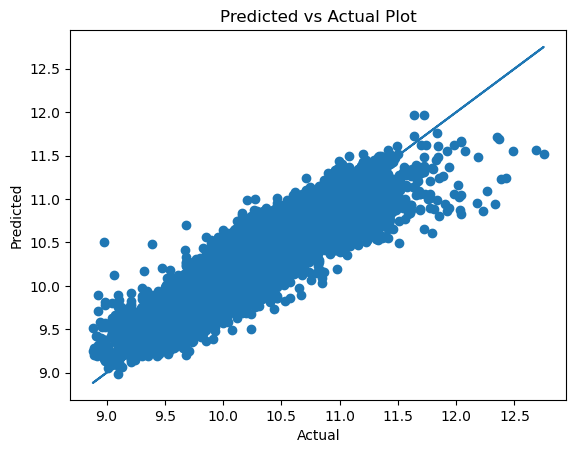

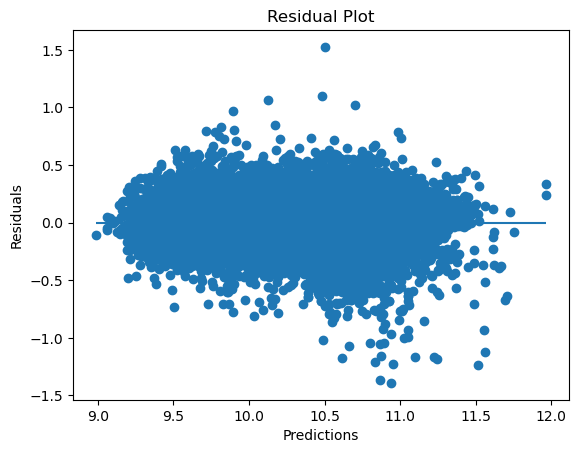

In [53]:
# Step 2: Init the Model
lr = LinearRegression()

# Do Machine Learning
doRegression(lr, X_train, X_test, y_train, y_test)

TRAIN METRICS
    R2: 0.8729667131914499
    MSE: 0.023221900009104
    RMSE: 0.15238733546165836
    MAE: 0.11172033766755923
    
TEST METRICS
    R2: 0.8732737422705943
    MSE: 0.023266238062616025
    RMSE: 0.1525327442309225
    MAE: 0.11154499587827023
    


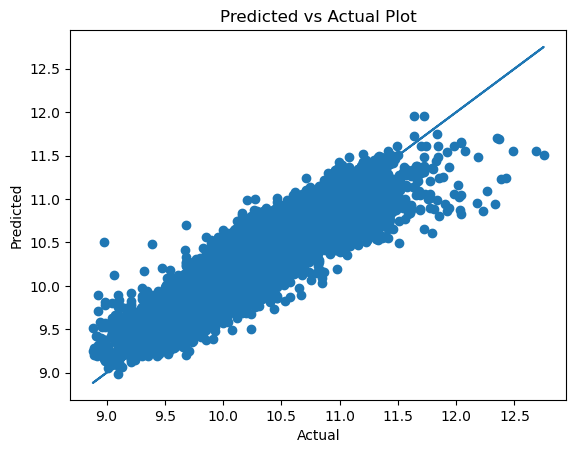

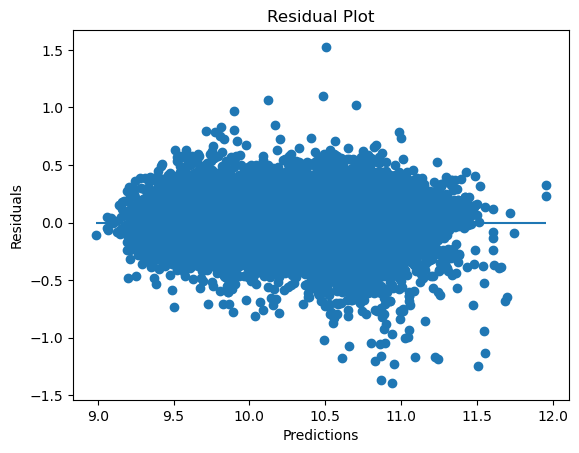

In [54]:
# Step 2: Init the Model
ridge = Ridge()

# Do Machine Learning
doRegression(ridge, X_train, X_test, y_train, y_test)

TRAIN METRICS
    R2: -2.220446049250313e-15
    MSE: 0.1828016938906841
    RMSE: 0.42755314744565276
    MAE: 0.34610788257617564
    
TEST METRICS
    R2: -2.5723693286572313e-07
    MSE: 0.18359450096941535
    RMSE: 0.4284792888453482
    MAE: 0.34579658807778796
    


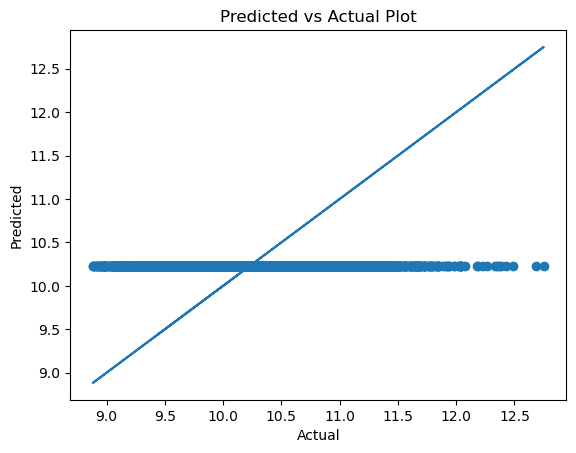

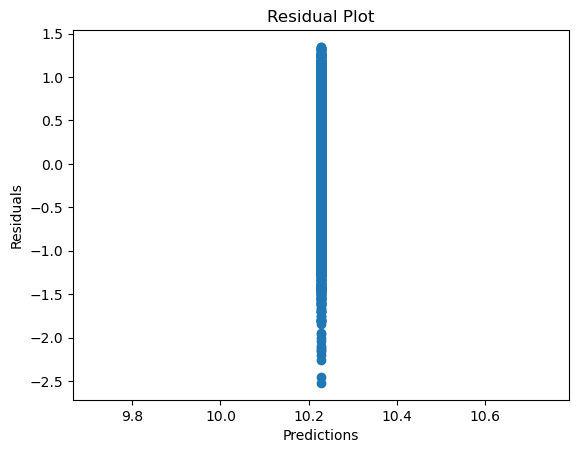

In [55]:
# Step 2: Init the Model
lasso = Lasso()

# Do Machine Learning
doRegression(lasso, X_train, X_test, y_train, y_test)

TRAIN METRICS
    R2: -2.220446049250313e-15
    MSE: 0.1828016938906841
    RMSE: 0.42755314744565276
    MAE: 0.34610788257617564
    
TEST METRICS
    R2: -2.5723693286572313e-07
    MSE: 0.18359450096941535
    RMSE: 0.4284792888453482
    MAE: 0.34579658807778796
    


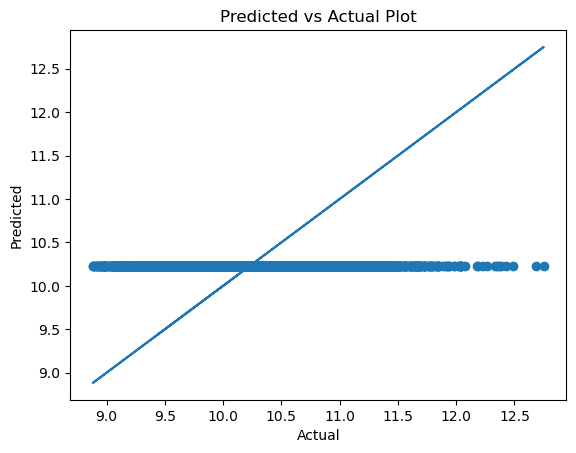

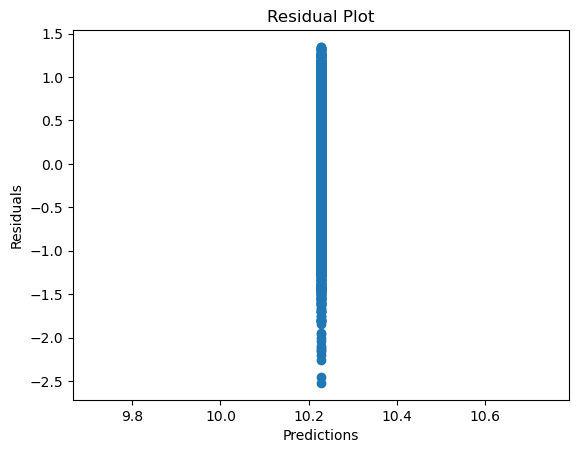

In [56]:
# Step 2: Init the Model
en = ElasticNet()

# Do Machine Learning
doRegression(en, X_train, X_test, y_train, y_test)

TRAIN METRICS
    R2: 0.9999977501318688
    MSE: 4.1127970542187366e-07
    RMSE: 0.0006413109272590587
    MAE: 6.9132652503181035e-06
    
TEST METRICS
    R2: 0.8724298886432601
    MSE: 0.023421164908364774
    RMSE: 0.15303974943904206
    MAE: 0.10936518551475344
    


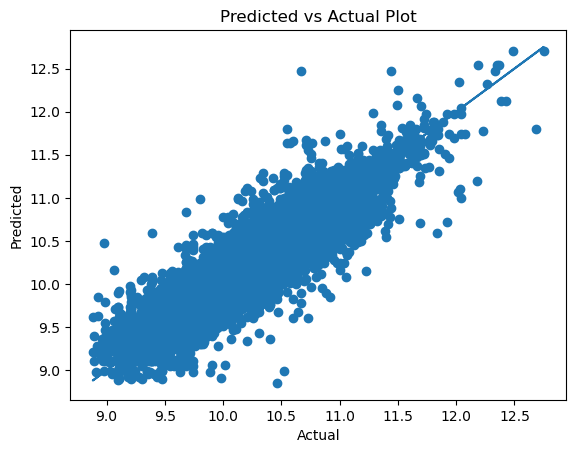

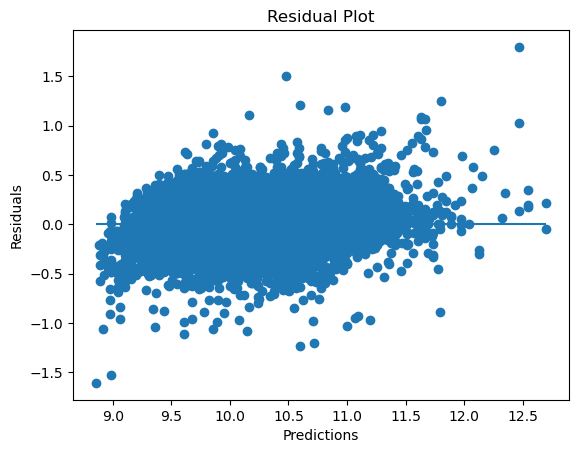

In [57]:
# Step 2: Init the Model
dt = DecisionTreeRegressor(random_state=42)

# Do Machine Learning
doRegression(dt, X_train, X_test, y_train, y_test)

TRAIN METRICS
    R2: 0.9893547064800674
    MSE: 0.0019459776874071947
    RMSE: 0.04411323709961892
    MAE: 0.03142479225860241
    
TEST METRICS
    R2: 0.9244069296268753
    MSE: 0.01387846846184505
    RMSE: 0.11780691177450095
    MAE: 0.08437418719231171
    


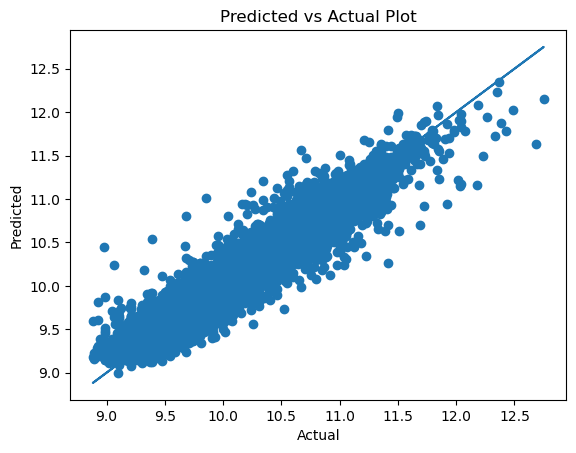

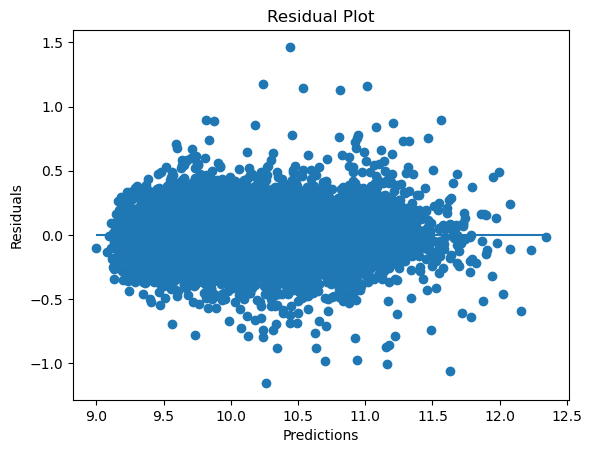

In [58]:
# Step 2: Init the Model
rf = RandomForestRegressor(random_state=42)

# Do Machine Learning
doRegression(rf, X_train, X_test, y_train, y_test)

TRAIN METRICS
    R2: 0.6335509516192418
    MSE: 0.0669875067686317
    RMSE: 0.25881944820401676
    MAE: 0.20464712202400986
    
TEST METRICS
    R2: 0.6335417031964825
    MSE: 0.06727971082091722
    RMSE: 0.25938332795481905
    MAE: 0.20495813992180295
    


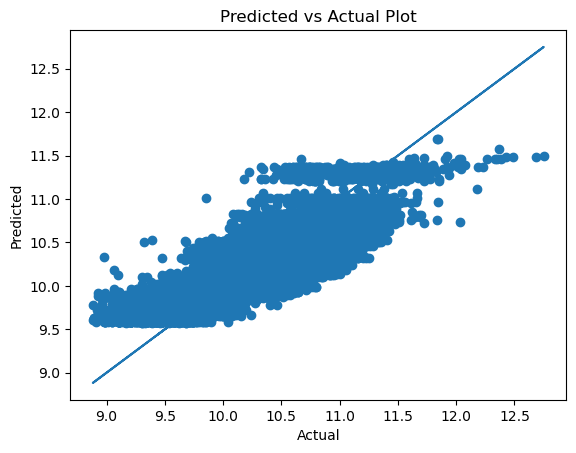

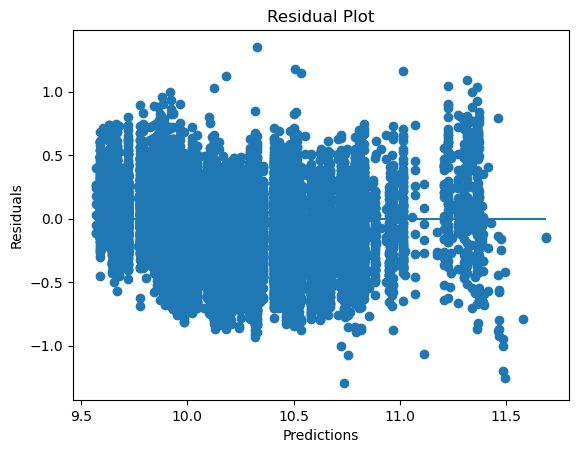

In [59]:
# Step 2: Init the Model
ada = AdaBoostRegressor(random_state=42)

# Do Machine Learning
doRegression(ada, X_train, X_test, y_train, y_test)

TRAIN METRICS
    R2: 0.9999977501318688
    MSE: 4.112797054218736e-07
    RMSE: 0.0006413109272590587
    MAE: 6.913265263809826e-06
    
TEST METRICS
    R2: 0.9203602835413195
    MSE: 0.014621410239410455
    RMSE: 0.1209190234802219
    MAE: 0.0862782101979003
    


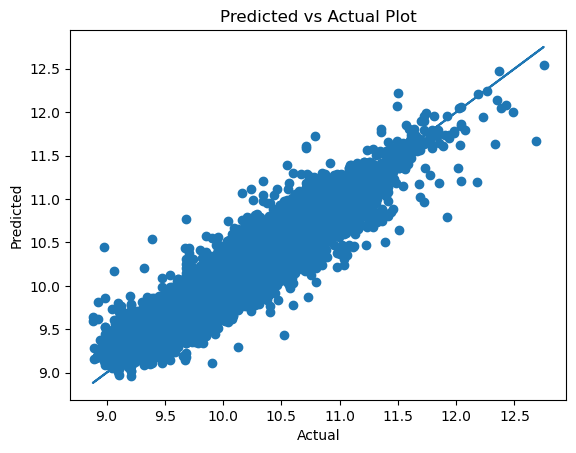

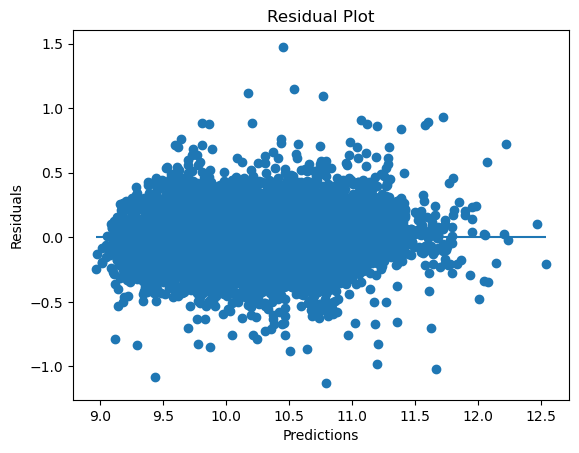

In [60]:
# Step 2: Init the Model
et = ExtraTreesRegressor(random_state=42)

# Do Machine Learning
doRegression(et, X_train, X_test, y_train, y_test)

TRAIN METRICS
    R2: 0.8361606322438784
    MSE: 0.029950113951797707
    RMSE: 0.17306101222342862
    MAE: 0.133666423241653
    
TEST METRICS
    R2: 0.8361480678649582
    MSE: 0.03008230597492737
    RMSE: 0.17344251490026133
    MAE: 0.13348074476589109
    


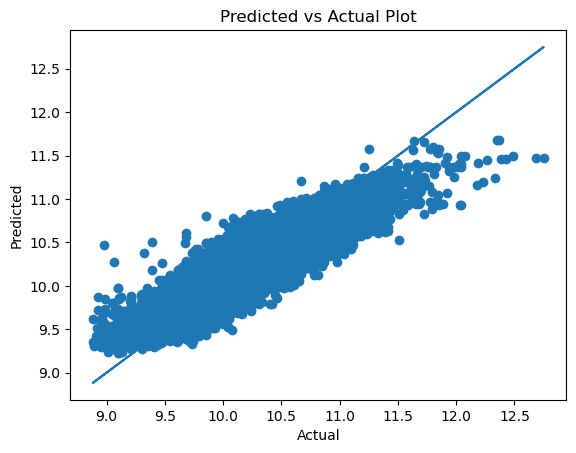

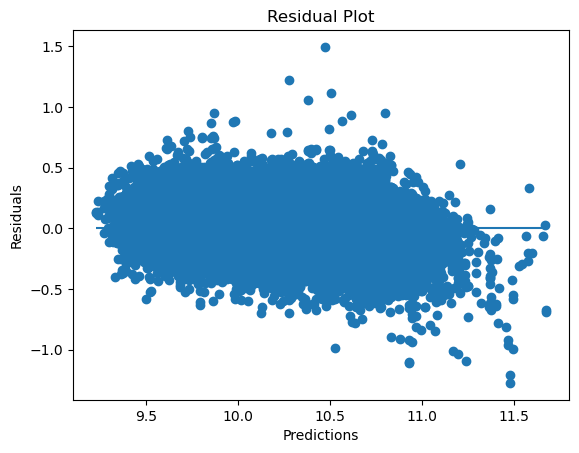

In [61]:
# Step 2: Init the Model
gb = GradientBoostingRegressor(random_state=42)

# Do Machine Learning
doRegression(gb, X_train, X_test, y_train, y_test)